In [57]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

In [58]:
df = pd.read_csv("data/24h_candle.csv", delimiter=',', index_col=0)
splitFrame = pd.DataFrame(df.date_time.str.split(' ',1).tolist(), columns = ['date','time'],index = df.index)
df = pd.concat([splitFrame[splitFrame.columns[0]], df[df.columns[2:-1]]], axis=1)
df.head()

,date,open,close,low,high,volume
#,,,,,,
1,2015-08-01,284.000000,279.845023,275.724508,284.000000,301.376392
2,2015-08-02,280.000000,286.438075,280.000000,286.438075,106.563859
3,2015-08-03,285.438300,288.965644,284.286275,288.965644,75.706794
4,2015-08-04,281.104486,288.000000,281.104486,288.000000,11.947218
5,2015-08-05,288.200000,287.569800,279.793314,288.965425,9.297527


In [4]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

openValue = go.Scatter( x = data.date, y = data.open, name = 'openValue')
closeValues = go.Scatter( x = data.date, y = data.close, name = 'closeValues')
highValue = go.Scatter( x = data.date, y = data.high, name = 'highValue')

iplot([openValue, highValue])

In [67]:
import plotly.graph_objs as go

trace = go.Candlestick(x=data.date,
                       open=data.open,
                       high=data.high,
                       low=data.low,
                       close=data.close,
                      text = data.columns)
layout = {
    'title': 'Candlestick BTC data',
    'yaxis': {'title': 'BTC-USD'},    
}
candleData = [trace]

fig = dict(data=candleData, layout=layout)

iplot(fig)

# Тест Дикки-Фуллера

Проверка стационарности временного ряда https://wikipedia.org/wiki/Тест_Дики_—_Фуллера

/home/jacob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/jacob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


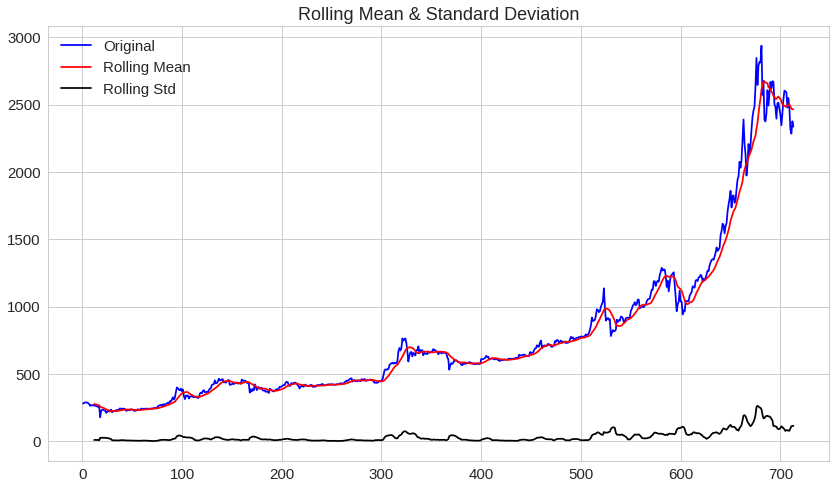

Results of Dickey-Fuller Test:
Test Statistic                   0.131411
p-value                          0.968141
#Lags Used                      20.000000
Number of Observations Used    692.000000
Critical Value (1%)             -3.439835
Critical Value (5%)             -2.865726
Critical Value (10%)            -2.568999
dtype: float64


In [59]:
from statsmodels.tsa.stattools import adfuller

timeseries = df.close

rolmean = pd.rolling_mean(timeseries, window=12)
rolstd = pd.rolling_std(timeseries, window=12)

orig = plt.plot(timeseries, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(timeseries, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

/home/jacob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


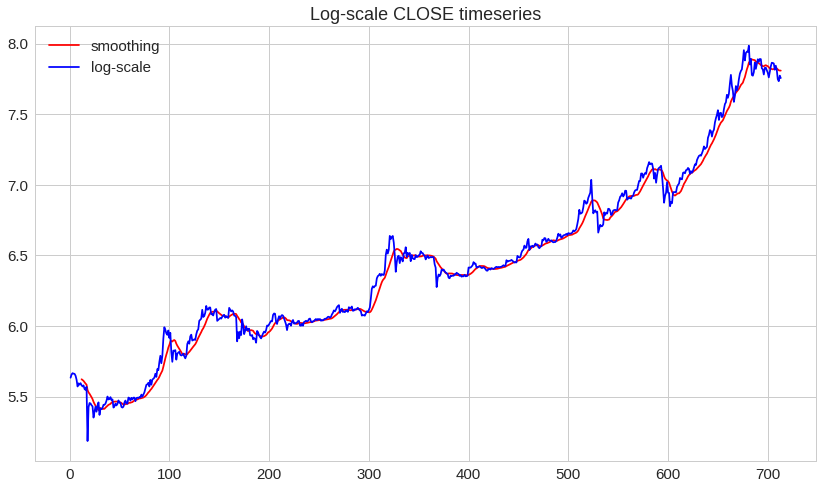

In [16]:
log_scale = np.log(timeseries)
moving_avg = pd.rolling_mean(log_scale, 12)

plt.title('Log-scale CLOSE timeseries')
plt.plot(moving_avg, label = 'smoothing',color='red')
plt.plot(log_scale, label = 'log-scale', color = 'blue')
plt.legend()
plt.show()

# Trend and seson

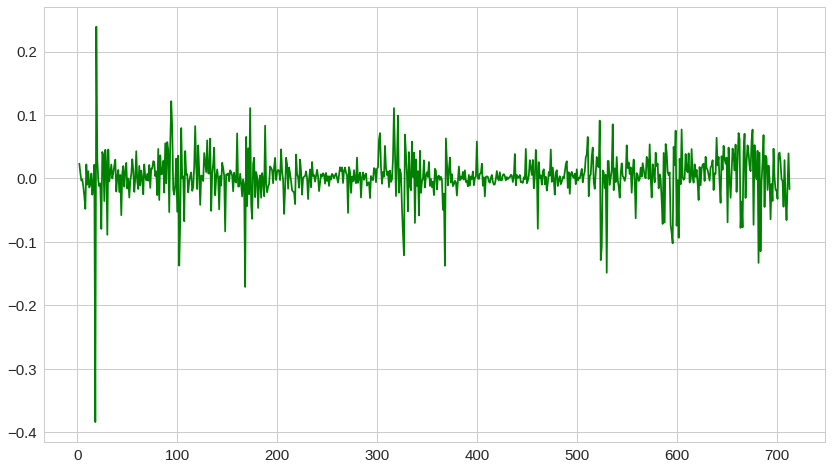

In [83]:
ts_log_diff = log_scale - log_scale.shift()
plt.plot(ts_log_diff, color = 'green')
plt.show()

## Statmodels tools for time-series analisys

http://www.statsmodels.org/dev/tsa.html

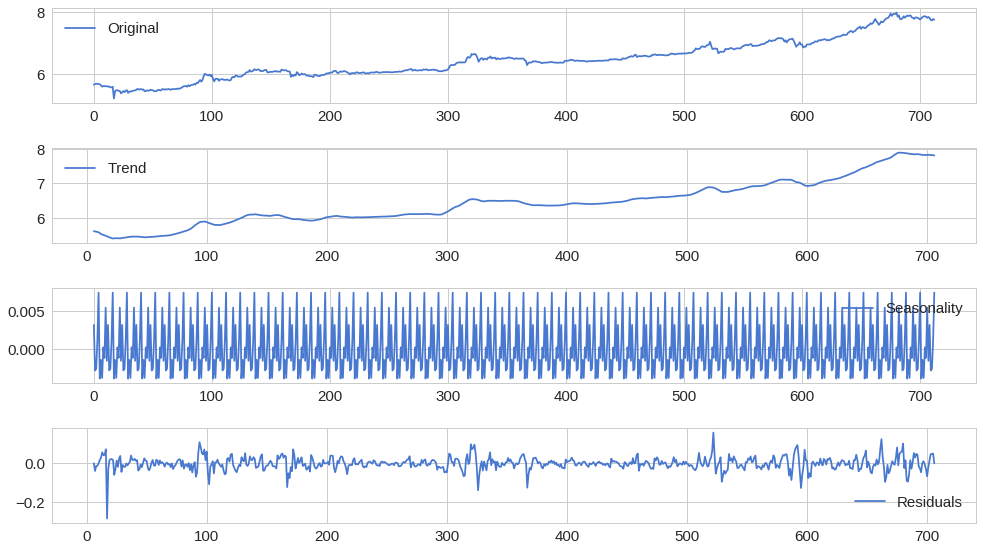

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(log_scale.values, freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_scale.values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()